# Introduction to Quantitative Finance

Copyright (c) 2019 Python Charmers Pty Ltd, Australia, <https://pythoncharmers.com>. All rights reserved.

<img src="img/python_charmers_logo.png" width="300" alt="Python Charmers Logo">

Published under the Creative Commons Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) license. See `LICENSE.md` for details.

Sponsored by Tibra Global Services, <https://tibra.com>

<img src="img/tibra_logo.png" width="300" alt="Tibra Logo">


## Module 1.1: Distributions and Random Processes

### 1.1.3: Moments

Moments describe distributions. We'll focus on the normal (and normal-ish) distributions for now, but will look at other distributions later.

A normal distribution is fully described by the first two moments, which are the mean and the variance. Reviewing the help for the `stats.norm` function, we can see these are the only two parameters we can input (see the docstring of the function).

In [12]:
%run setup.ipy

In [13]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

<div class="alert alert-success">
    Note: it's worth opening up setup.ipy and seeing what's in there. This file will be run at the start of most of our notebooks.
</div>

In [14]:
stats.norm?

As noted in that description, the first moment, the mean, is referred to as the location. It specifies where the normal distribution is centred.

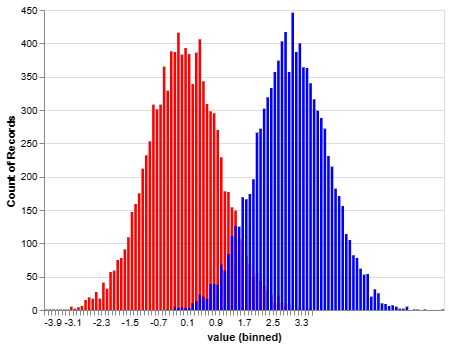

In [15]:
def plot_histogram_normal(mean, standard_deviation, color):
    distribution = stats.norm(mean, standard_deviation)
    normal_values = pd.DataFrame({"value": distribution.rvs(10000)})

    chart = alt.Chart(normal_values).mark_bar().encode(
        alt.X("value", bin=alt.Bin(maxbins=100)),
        y='count()',
        color=alt.value(color)
    )
    return chart

chart_1 = plot_histogram_normal(0, 1, "red")
chart_2 = plot_histogram_normal(3, 1, "blue")
chart_1 + chart_2

The mean is the expected value of the distribution. Given all other things equal, if we chose *n* values randomly from this distribution, the average value (mean) would be equal to the mean of the distribution. This might seem like circular knowledge, but note the values are computed in different ways:

In [16]:
actual_mean = 57
standard_deviation = random.random() * 10
N_TRIALS = 100000

distribution = stats.norm(actual_mean, standard_deviation)
normal_values = distribution.rvs(N_TRIALS)

In [17]:
np.mean(normal_values)

57.00667548385571

In [18]:
error = np.mean(normal_values) - actual_mean
print("The actual mean was {actual_mean}, while the computed mean was {computed_mean:.3f}".format(
    actual_mean=actual_mean, computed_mean=np.mean(normal_values)))
print("This gives an error of {error:.3f}".format(error=error))

The actual mean was 57, while the computed mean was 57.007
This gives an error of 0.007


Note that the mean is not the median, although in a normal distribution, they are usually about the same (and theoretically they are the same value). The median is not a "moment".

In [19]:
np.median(normal_values)

56.99757922193349

The second moment of a normal distribution is the variance, also known as the scale factor of the distribution. It is the expected value of the squared difference between a random value and the mean:

$V=\frac{1}{n}\sum^n_{i=0}(X_i-\mu)^2$

Note that the square in the result makes the unit squared as well. For instance, if our measurements were in metres $m$, the variance would be in metres squared, $m^2$. As a result, it's not directly comparable to the initial value. For instance:

In [20]:
V = np.var(normal_values)
V

5.56763884049314

We can not directly compare this to our original units, i.e. we can not say the variance is "about 0.5% of the mean".
Such a statment is meaningless as the units are different. 
For that reason, we usually use the square root of the variance, known as the standard deviation, which is in the same units as X, and is therefore comparable in such a way:

$V=\sigma^2=\frac{1}{n}\sum^n_{i=0}(X_i-\mu)^2$

It is this "standard deviation" that is the second input into our `stats.norm` function:

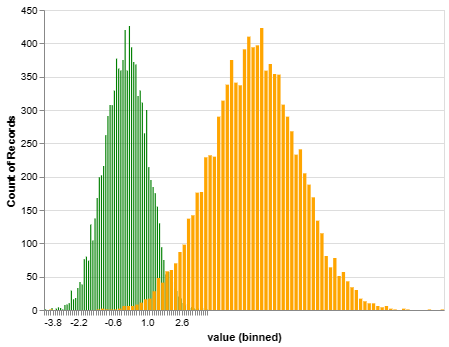

In [21]:
chart_3 = plot_histogram_normal(0, 1, "green")
chart_4 = plot_histogram_normal(6, 2, "orange")
chart_3 + chart_4

The larger standard deviation makes the distribution more spread out, but it is the same shape, simply "scaled".

### Further Moments

There are two further moments in common use. The third sequentially is called the skew.
It can be visualised as "pulling" the distribution to the left (negative skew) or right (positive skew).

A normal distribution is symmetrical, and has a skew of 0. This is why it does not appear in the equation or function calls to generate the normal distribution.

The fourth standardised moment is the kurtosis, more commonly seen in financial data than in many other datasets. A higher value indicates "fatter tails" than a standard normal distribution. The kurtosis value of a normal distribution is always 3 - we consider this our baseline when interpreting the kurtosis value of other distributions.

In [22]:
stats.skewnorm(4)

In [23]:
stats.skewnorm?

In [24]:
def plot_histogram_normal_skewed(mean, standard_deviation, skew, color):
    distribution = stats.skewnorm(skew, loc=mean, scale=standard_deviation)
    normal_values = pd.DataFrame({"value": distribution.rvs(10000)})

    chart = alt.Chart(normal_values).mark_bar().encode(
        alt.X("value", bin=alt.Bin(maxbins=100)),
        y='count()',
        color=alt.value(color)
    )
    return chart

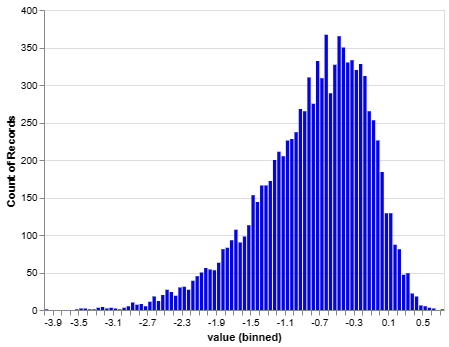

In [25]:
plot_histogram_normal_skewed(0, 1, -4, "blue")

For seeing the kurtosis in action, let's look at some data. We will load in the AAPL stock price from a h5 file:

In [26]:
import pandas as pd
aapl = pd.read_hdf("data/AAPL.h5", key="AAPL")

In [27]:
aapl.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,104.87,112.50,101.69,111.94,19144400,27.74
2000-01-04,108.25,110.62,101.19,102.50,18310000,25.40
2000-01-05,103.75,110.56,103.00,104.00,27818000,25.77
2000-01-06,106.12,107.00,95.00,95.00,27443200,23.54
2000-01-07,96.50,101.00,95.50,99.50,16463200,24.66


#### Exercises

1. Compute the increase in price for each day (Close - Open)
2. Plot a histogram of these increases
3. Investigate the `stats.skew` and `stats.kurtosis` functions to compute the third and fourth moment of the dataset.

*For solutions, see `solutions/moments.py`*

#### Extended exercise

Quandl has a python module for extracting datasets. The documentation is available at https://www.quandl.com/tools/python

Install this module, and review the documentation to obtain stock prices for the following four tech giants:
* IBM
* Google
* Apple (more up-to-date than our dataset)
* Amazon

Compute the skew and kurtosis of each stock, and compare the results. Looking at the histograms of the stock prices, the skew and the kurtosis, what does this tell you about the usefulness of these moments?

Note: Extended exercises are more open-ended than normal exercises, and may take significantly longer to complete. They also tend to be harder than other exercises. 

In [29]:
#1
aapl["DayChange"] = aapl.Close - aapl.Open

In [30]:
aapl.DayChange.head()

Date
2000-01-03     7.07
2000-01-04    -5.75
2000-01-05     0.25
2000-01-06   -11.12
2000-01-07     3.00
Name: DayChange, dtype: float64

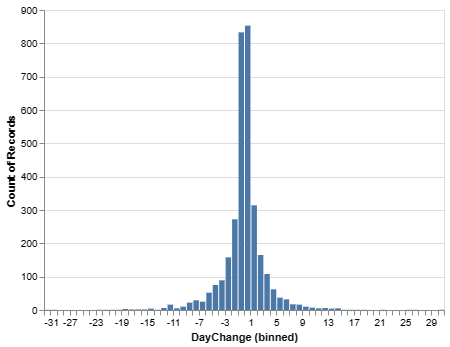

In [31]:
#2
alt.Chart(aapl).mark_bar().encode(
        alt.X("DayChange", bin=alt.Bin(maxbins=100)),
        y = "count()"
    )

In [44]:
#3

skew = stats.skew(aapl.DayChange)
kurtosis = stats.kurtosis(aapl.DayChange)

print('Skew: %s' % skew)
print('Kurtosis: %s' % kurtosis)

Skew: -0.358956165562
Kurtosis: 12.862787459


Skew: -0.358956165562
Kurtosis: 12.862787459


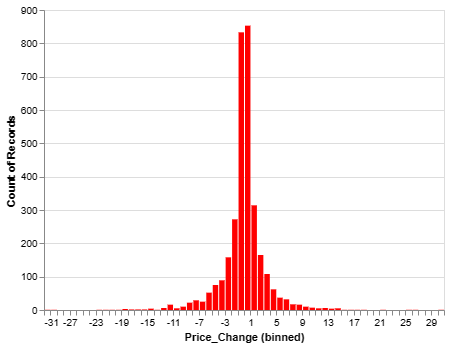

In [45]:
aapl['Price_Change'] = aapl['Close'] - aapl['Open']
aapl.head()


chart = alt.Chart(aapl).mark_bar().encode(
        alt.X("Price_Change", bin=alt.Bin(maxbins=100)),
        y='count()',
        color=alt.value('red'))
chart.display()

print("Skew: " + str(stats.skew(aapl['Price_Change'])))
print("Kurtosis: " + str(stats.kurtosis(aapl['Price_Change'])))

*For solutions, see `solutions/moments.py`*

### Z-scores

A "z-score" is a common normalisation method used for data. It removes the scale of the data, and instead considers the size of the data in terms of the standard deviation. It is a transformation of the data from one scale to another, using the mean and standard deviation:

In [46]:
original_data = np.array([10, 20, 5, 105, 30, 17, 19], dtype=np.float32)
m = np.mean(original_data)
s = np.std(original_data)

The transformation is to subtract the mean, and divide by the standard deviation:

In [47]:
zscores = (original_data - m) / s

In [48]:
zscores

array([-0.612737  , -0.29735765, -0.77042663,  2.3833666 ,  0.01802167,
       -0.39197144, -0.3288956 ], dtype=float32)

The values of the z-scores are normalised, allowing us to compare data from different scales - for instance, comparing the stock prices between AAPL and MSFT for a period of one month, where direct comparisons are initially hard. 

Let's load some data from Quandl. To do that, create a file called `my_secrets.py` and create a value called `QUANDL_API_KEY` and set that equal to your API key from Quandl. You can obtain one by signing up at https://www.quandl.com/tools/api and then viewing your profile page at https://www.quandl.com/account/profile

You can copy the file `my_secrets_template.py` to create this file for you. Just copy the file and fill out the data. Ensure this file is in the same directory as your notebooks.

In [49]:
%%writefile my_secrets.py

QUANDL_API_KEY = ""

Writing my_secrets.py


In [50]:
import quandl
import my_secrets
quandl.ApiConfig.api_key = my_secrets.QUANDL_API_KEY

In [52]:
data = quandl.get_table('WIKI/PRICES', ticker = ['MSFT', 'AAPL'], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': '2017-01-01', 'lte': '2019-01-01' }, 
                        paginate=True)

In [53]:
data.sample(5)
type(data)

pandas.core.frame.DataFrame

If we compare the means, we see that AAPL has a higher adjusted close value.

In [54]:
data.groupby("ticker")['adj_close'].mean()

ticker
AAPL    154.137248
MSFT     75.098922
Name: adj_close, dtype: float64

However, we might be more interested to see whether movements swing wildly, or are stable with regard to the current price.

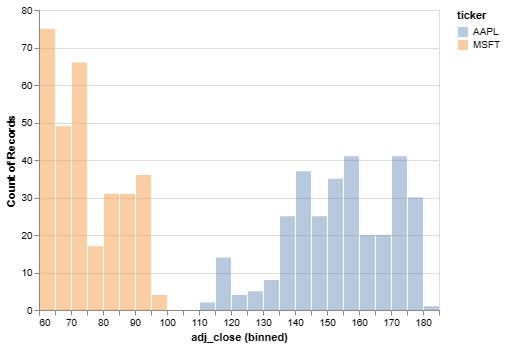

In [55]:
alt.Chart(data).mark_bar(opacity=0.4).encode(
    x=alt.X("adj_close", bin=alt.Bin(maxbins=30)),
    y=alt.Y('count()', stack=None),
    # column='ticker',
    color='ticker',
)

To truly compare these distributions, we need to convert them to z-scores first, which gives us more information about the relative stock price movements:

In [56]:
data.columns

Index([u'ticker', u'date', u'adj_close'], dtype='object')

In [57]:
prices = data.pivot(columns="ticker", index="date", values='adj_close')
z_scores = (prices - prices.mean())/prices.std()
z_scores.head()

ticker,AAPL,MSFT
date,,
2017-01-03,-2.399152,-1.330589
2017-01-04,-2.406966,-1.356847
2017-01-05,-2.371503,-1.356847
2017-01-06,-2.293364,-1.306206
2017-01-09,-2.228449,-1.324962


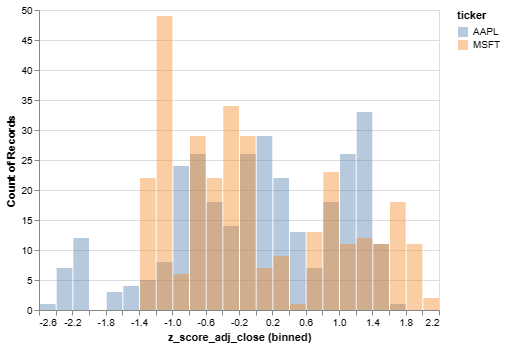

In [58]:
alt.Chart(z_scores.melt(value_name="z_score_adj_close")).mark_bar(opacity=0.4).encode(
    x=alt.X("z_score_adj_close", bin=alt.Bin(maxbins=30)),
    y=alt.Y('count()', stack=None),
    # column='ticker',
    color='ticker',
)

We can now compare the distributions, visually and directly against each other. This specific analysis doesn't tell us much, but we can use z-scores to compare distributions of data from different scales, as we saw above.

#### Exercise

Perform the same analysis, but using the increase in adjusted closing price in a given day, rather than the absolute value.

In [65]:
prices_diff = data.pivot(columns="ticker", index="date", values='adj_close').diff()
print(prices_incr.head())

ticker          AAPL      MSFT
date                          
2017-01-03       NaN       NaN
2017-01-04 -0.128394 -0.273911
2017-01-05  0.582713  0.000000
2017-01-06  1.283943  0.528257
2017-01-09  1.066660 -0.195651


In [66]:
z_scores_diff = (prices_diff - prices_diff.mean())/prices_diff.std()
z_scores_diff.head()

ticker,AAPL,MSFT
date,,
2017-01-03,NaN,NaN
2017-01-04,-0.149578,-0.367208
2017-01-05,0.215154,-0.092118
2017-01-06,0.574820,0.438412
2017-01-09,0.463374,-0.288611


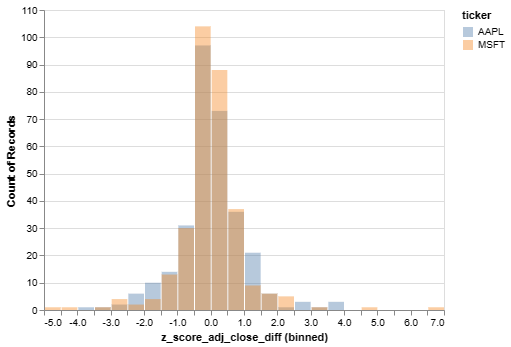

In [67]:
alt.Chart(z_scores_diff.melt(value_name="z_score_adj_close_diff")).mark_bar(opacity=0.4).encode(
    x=alt.X("z_score_adj_close_diff", bin=alt.Bin(maxbins=30)),
    y=alt.Y('count()', stack=None),
    color='ticker',
)

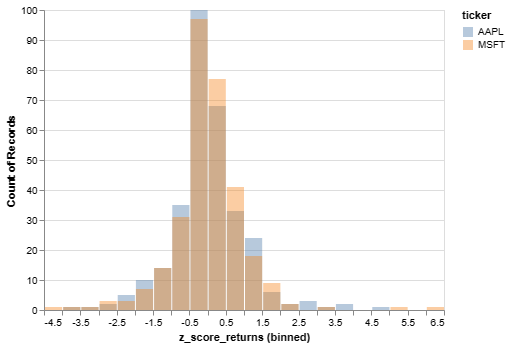

In [68]:
returns = prices.pct_change().iloc[1:,:]
z_rets = (returns - returns.mean())/returns.std()

alt.Chart(z_rets.melt(value_name="z_score_returns")).mark_bar(opacity=0.4).encode(
    x=alt.X("z_score_returns", bin=alt.Bin(maxbins=30)),
    y=alt.Y('count()', stack=None),
    # column='ticker',
    color='ticker',
)

*For solutions, see `solutions/adjusted_increases.py`*